## Exploratory Data Analysis of Rossmann Pharmaceuticals Sales Data

### IMPORTING LIBRARIES

In [354]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys,os
import warnings



In [355]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_cleaner import *
from df_selector import *
from df_visualizer import *


In [356]:
!pip install plotly 


In [357]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

### DATA COLLECTION (Reading Data)

In [358]:
# create a FileHandler object
file_handler = FileHandler()

In [359]:
# reading the store csv file
store_df = file_handler.read_csv("../Data/store.csv")
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [360]:
# reading the sales training csv file
train_df = file_handler.read_csv("../Data/train.csv")
train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [361]:
# reading the sales training csv file
test_df = file_handler.read_csv("../Data/test.csv")
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


### DATA CLEANING

#### for Store Dataframe

In [362]:
store_df.shape

(1115, 10)

In [363]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [364]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [365]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### for train Data Frame 

In [366]:
train_df.shape

(1017209, 18)

In [367]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [368]:
train_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [369]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000



##### 1. HANDLING MISSING VALUES


##### for store dataframe


In [370]:
percent_missing_values(store_df)

The dataset contains 21.01 % missing values.


In [371]:
missing_df = missing_values_table(store_df)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


In [372]:
missing_df

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


From the missing table (missing_df), there is two groups with patterns. it means group with same number of missing values. first group is first 3 columns( Promo2sinceWeek,Promo2sinceYear,PromoInterval )and second group is next two columns(CompetitionOpenSinceMonth, CompetitionOpenSinceYear). 



In [373]:
#Number of rows with missing values for the whole dataset
count_missing_rows(store_df)

750 rows(67.26%) contain atleast one missing value.


In [374]:
# number of rows with missing values for group 1 (Promo2SinceWeek, Promo2SinceYear, and PromoInterval)
count_missing_rows(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']])

544 rows(48.79%) contain atleast one missing value.


In [375]:
# number of rows with missing values for group 2 (CompetitionOpenSinceMonth, and CompetitionOpenSinceYear)
count_missing_rows(store_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']])

354 rows(31.75%) contain atleast one missing value.


As guessed we have got an interesting insight. Each columuns in these groups have missing values in the same rows as their groupmates. These means the missing values in these groups appear at the same time as a cluster. From the column names and the data fields' description in the challange document we can understand that the values of the columns in each group share a common information. Let's investigate.

In [376]:
# dataframe containing the missing rows for columns in group 1
group1_df = store_df[store_df['Promo2SinceWeek'].isna()]
group1_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


We can see that the Promo2 column is 0 for the first 10 rows. From intution we can infer that if there is no promotion the values for the columns in gropu 1(Promo2SinceWeek, Promo2SinceYear, and PromoInterval) should be null. Let's prove it.

In [377]:
# all unique values for each column
unique_values_df(group1_df)

,Column,Unique values
0,Store,"[1, 758, 741, 742, 747, 751, 755, 757, 760, 4,..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[a, c, b]"
3,CompetitionDistance,"[250.0, 140.0, 50.0, 2640.0, 30.0, 420.0, 720...."
4,CompetitionOpenSinceMonth,"[9.0, 4.0, 11.0, 3.0, 12.0, 10.0, 7.0, 6.0, 2...."
5,CompetitionOpenSinceYear,"[2013.0, 2012.0, 2014.0, 2009.0, 2010.0, 2005...."
6,Promo2,[0]
7,Promo2SinceWeek,[]
8,Promo2SinceYear,[]
9,PromoInterval,[]


In [378]:
group1_df['Promo2'].value_counts()

0    544
Name: Promo2, dtype: int64

All 544 values are 0. Now let's check the count of 0 in the Promo2 column for the whole store dataset.

In [379]:
store_df['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

as we see, all rows with 0 value in their Promo2 columns
have null values in the columns Promo2SinceWeek, Promo2SinceYear, and PromoInterval.

Now let's impute the missing values in the columns Promo2SinceWeek and Promo2SinceYear with 0 to convey the meaning of absence since year and week can't be 0. For PromoInterval we should dig deeper what kind of data it holds since its data type is object


In [380]:
# check the exact data type of the object
pd.api.types.infer_dtype(store_df['PromoInterval'])

'string'

In [381]:
# all the unique values 
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

For the column PromoInterval, we will impute it with '0,0,0,0' as the other values follow list-type format containing four months. So inorder to impute these columns we should first investigate if the values we will insert exist in each column as this will oppose our intention.

In [382]:
print ("for Promo2SinceWeek ",store_df[store_df['Promo2SinceWeek']== 0].shape)

print ("for Promo2SinceYear ",store_df[store_df['Promo2SinceYear'] == 0].shape)
print ("for Promo2SinceYear ",store_df[store_df['PromoInterval'] == '0,0,0,0'].shape)


for Promo2SinceWeek  (0, 10)
for Promo2SinceYear  (0, 10)
for Promo2SinceYear  (0, 10)


 *filling the missing values*

In [383]:
fix_missing_value(store_df, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

544 missing values in the column Promo2SinceWeek have been replaced by 0.
544 missing values in the column Promo2SinceYear have been replaced by 0.


In [384]:
fix_missing_value(store_df, ['PromoInterval'], '0,0,0,0')

544 missing values in the column PromoInterval have been replaced by 0,0,0,0.


In [385]:
# dataframe containing the missing rows for columns in group 1
group2_df = store_df[store_df['CompetitionOpenSinceMonth'].isna()]
group2_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
28,29,d,c,2170.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [386]:
# all unique values for each column in the dataframe
unique_values_df(group2_df)

,Column,Unique values
0,Store,"[12, 853, 767, 766, 764, 762, 757, 756, 742, 7..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[c, a, b]"
3,CompetitionDistance,"[250.0, 2410.0, 50.0, 210.0, 840.0, 220.0, 150..."
4,CompetitionOpenSinceMonth,[]
5,CompetitionOpenSinceYear,[]
6,Promo2,"[1, 0]"
7,Promo2SinceWeek,"[0.0, 40.0, 14.0, 45.0, 31.0, 22.0, 5.0, 1.0, ..."
8,Promo2SinceYear,"[0.0, 2013.0, 2011.0, 2009.0, 2012.0, 2014.0, ..."
9,PromoInterval,"[0,0,0,0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Ma..."


I can't see any pattern with the other columns. But from the column names and the data fields' description in the challange document we can understand that if CompetitionOpenSinceMonth and CompetitionOpenSinceYear are null it means there was already a competition when the store was opened. So we need impute the missing values in a meaningful way. Before doing that we will hold this meaning of an already existing competition in a separate column named CompetitionBeforeStoreOpened so that we can make use of this information in our analysis and prediction. This column will hold values of 0 and 1, 0 indicating the absence of competition at the time the store was opened and 1 indicating the presence of competition at the time the store was opened.

In [387]:
# deriving new column
store_df['CompetitionBeforeStoreOpened'] = store_df['CompetitionOpenSinceYear'].apply(lambda x: 1 if np.isnan(x) else 0)
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0


Now we can impute the columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear. So we will impute missing values in the column CompetitionOpenSinceYear and CompetitionOpenSinceMonth with its minimun value and 1 respectively. This kind of imputing assumes that the stores with missing values in these columns were opened after the first month of the minimum year value in the column CompetitionOpenSinceYear.

Let's find the minimum year value for CompetitionOpenSinceYear and impute the missing values.

In [388]:
min_year = store_df['CompetitionOpenSinceYear'].min()
min_year

1900.0

In [389]:
# impute the column CompetitionOpenSinceYear with 1900 and the column CompetitionOpenSinceMonth with 1
fix_missing_value(store_df, ['CompetitionOpenSinceYear'], min_year)
fix_missing_value(store_df, ['CompetitionOpenSinceMonth'], 1)

354 missing values in the column CompetitionOpenSinceYear have been replaced by 1900.0.
354 missing values in the column CompetitionOpenSinceMonth have been replaced by 1.


In [390]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0


Now we are left with missing values in the column CompetitionDistance. Let's see the rows containing these missing values.

In [391]:
temp_df = store_df[store_df['CompetitionDistance'].isna()]
temp_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
290,291,d,a,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
621,622,a,c,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
878,879,d,a,NaN,1.0,1900.0,1,5.0,2013.0,"Feb,May,Aug,Nov",1


In [392]:
unique_values_df(temp_df)

,Column,Unique values
0,Store,"[291, 622, 879]"
1,StoreType,"[d, a]"
2,Assortment,"[a, c]"
3,CompetitionDistance,[]
4,CompetitionOpenSinceMonth,[1.0]
5,CompetitionOpenSinceYear,[1900.0]
6,Promo2,"[0, 1]"
7,Promo2SinceWeek,"[0.0, 5.0]"
8,Promo2SinceYear,"[0.0, 2013.0]"
9,PromoInterval,"[0,0,0,0, Feb,May,Aug,Nov]"


All rows with missing values in the column CompetitionDistance has a value of 1 in the column CompetitionBeforeStoreOpened. But this doesn't give us much information why the CompetitionDistance is null. But from common sense I guess this is because the competitions for these stores are very far away and have almost no impact on these stores that they weren't measured when collecting the data. For this reason, I will impute this values with the maximum competition distance.

In [393]:
max_dist = store_df['CompetitionDistance'].max()
max_dist

75860.0

In [394]:
fix_missing_value(store_df, ['CompetitionDistance'], max_dist)

3 missing values in the column CompetitionDistance have been replaced by 75860.0.


In [395]:
# final check for missing values
percent_missing_values(store_df)

The dataset contains 0.0 % missing values.


##### for Train dataframe 

In [396]:
percent_missing_values(train_df)

The dataset contains 11.87 % missing values.


We do not have any missing values in this dataset, we are lucky as it contains more than a million rows. 

#### 2. DATA TYPES 



checking if there is columns with mixed data types

##### Store dataframe

In [397]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

In [398]:
show_cols_mixed_dtypes(store_df)

None of the columns contain mixed types.


In [399]:
store_df.dtypes

Store                             int64
StoreType                        object
Assortment                       object
CompetitionDistance             float64
CompetitionOpenSinceMonth       float64
CompetitionOpenSinceYear        float64
Promo2                            int64
Promo2SinceWeek                 float64
Promo2SinceYear                 float64
PromoInterval                    object
CompetitionBeforeStoreOpened      int64
dtype: object

As we can see from the above data type of store the columns StoreType, Assortment and PromoInterval hold object. Even though PromoInterval holds list values, the are enclosed in string literals. We will convert the data types of these three columns to string. 

In [400]:
# get the columns with object data type
string_columns = store_df.select_dtypes(include='object').columns.tolist()
string_columns

['StoreType', 'Assortment', 'PromoInterval']

In [401]:
convert_to_string(store_df, string_columns)

the columns CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear contain week, month and year information have float as dtype.  So we will change the data type of these columns to int64.

In [402]:
convert_to_int(store_df, ['CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 'Promo2SinceYear'])

In [403]:
#Then we check again for dtypes of our dataframe
store_df.dtypes

Store                             int64
StoreType                        string
Assortment                       string
CompetitionDistance             float64
CompetitionOpenSinceMonth         int64
CompetitionOpenSinceYear          int64
Promo2                            int64
Promo2SinceWeek                   int64
Promo2SinceYear                   int64
PromoInterval                    string
CompetitionBeforeStoreOpened      int64
dtype: object

In [404]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9,2009,0,0,0,"0,0,0,0",0
4,5,a,a,29910.0,4,2015,0,0,0,"0,0,0,0",0


##### Train data frame 

In [405]:
#checking for the mixed data types
show_cols_mixed_dtypes(train_df)

None of the columns contain mixed types.


as we see, the state Holiday container mixed interger, let check it unique values

In [406]:
train_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [407]:
train_df['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

 0 is represented as an integer and a string. Since there are other string values we will convert the StateHoliday column into string.

In [408]:
convert_to_string(train_df, ['StateHoliday'])

In [409]:
train_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  string
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [410]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


Date column contain datetime values but it has object dtype, so we have to convert it in datetime

In [411]:
convert_to_datetime(train_df, ['Date'])

In [412]:
train_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         string
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

#### 3. HANDLING DUPLICATES
##### For Store Dataframe

In [413]:
# search for duplicate rows and drop them
drop_duplicates(store_df)

No duplicate rows were found.


Since store is the id that uniquely identifies each record, there should be no duplicates. Let's check that.

In [414]:
store_df.duplicated(subset=['Store']).all()

False

We are safe. No two rows in our dataset contain the same Store value.

##### For Train Data Frame 

In [415]:
# search for duplicate rows and drop them
drop_duplicates(train_df)

No duplicate rows were found.


Store and Date are the columns that uniquely identify each record, there should be no duplicates. We can't have duplicate data for a store with the same date. Let's check whether such cases exist.

In [416]:
train_df.duplicated(subset=['Store', 'Date']).all()

False

We are safe. No two rows in our dataset contain the same combination of Store and Date values.

#### 4. FEATURE ENGINEERING 

##### Train dataframe 

Even though we have a date column it will be complex to query our data based on week, month, year, etc. So inorder tp gain complex insights easily, I have derived the following features.

In [417]:
train_df['Year'] = train_df['Date'].apply(lambda x: x.year)
train_df['Month'] = train_df['Date'].apply(lambda x: x.month)
train_df['DayOfMonth'] = train_df['Date'].apply(lambda x: x.day)
train_df['WeekOfYear'] = train_df['Date'].apply(lambda x: x.weekofyear)
train_df['weekday'] = train_df['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

In [418]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  string        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [419]:
train_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,DayOfMonth,WeekOfYear,weekday
495819,544,2,2013-09-10,20366,2432,1,1,0,0,a,a,250.0,12.0,2001.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,9,10,37,1
653547,718,3,2013-06-26,6449,818,1,0,0,0,a,a,1100.0,6.0,2015.0,0,NaN,NaN,NaN,2013,6,26,26,1
680971,748,5,2013-10-04,6752,568,1,0,0,0,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,10,4,40,1
771142,846,3,2013-01-30,6975,707,1,0,0,0,a,c,8860.0,4.0,2004.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",2013,1,30,5,1
229922,253,6,2013-05-04,4896,604,1,0,0,0,a,c,250.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov",2013,5,4,18,0
907922,996,7,2014-11-16,0,0,0,0,0,0,c,a,2870.0,7.0,2015.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,11,16,46,0
224672,248,7,2014-10-26,0,0,0,0,0,0,a,c,340.0,9.0,2012.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct",2014,10,26,43,0
41791,46,2,2013-09-10,6381,716,1,1,0,1,c,a,1200.0,9.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,9,10,37,1
458546,503,6,2014-01-11,7112,523,1,0,0,0,d,c,13080.0,9.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,1,11,2,0
845243,928,1,2014-02-17,13255,995,1,1,0,0,d,c,1090.0,NaN,NaN,1,31.0,2013.0,"Feb,May,Aug,Nov",2014,2,17,8,1


In [420]:
def getMonth(month_list, index):
    month =  months = ['0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    month_list = month_list.split(',')
    month = month_list[index]
    return months.index(month)

In [421]:
# split the PromoInterval column into 4 columns
store_df['PromoInterval0'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 0)))
store_df['PromoInterval1'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 1)))
store_df['PromoInterval2'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 2)))
store_df['PromoInterval3'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 3)))

In [422]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
344,345,a,a,120.0,1,1900,1,22,2012,"Jan,Apr,Jul,Oct",1,1,4,7,10
388,389,a,c,6690.0,8,2011,0,0,0,"0,0,0,0",0,0,0,0,0
896,897,c,c,3290.0,1,2007,1,5,2013,"Feb,May,Aug,Nov",0,2,5,8,11
910,911,a,c,16490.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0
471,472,c,c,5030.0,8,2011,0,0,0,"0,0,0,0",0,0,0,0,0
261,262,b,a,1180.0,5,2013,0,0,0,"0,0,0,0",0,0,0,0,0
1010,1011,a,c,490.0,9,2012,1,18,2011,"Feb,May,Aug,Nov",0,2,5,8,11
1111,1112,c,c,1880.0,4,2006,0,0,0,"0,0,0,0",0,0,0,0,0
468,469,c,c,710.0,9,2005,0,0,0,"0,0,0,0",0,0,0,0,0
1009,1010,d,c,4610.0,6,2010,1,18,2010,"Feb,May,Aug,Nov",0,2,5,8,11


#### Merging Dataframes And Saving Data

In [423]:
# save the clean dataframe to a csv file
file_handler.to_csv(train_df, '../Data/Train.csv')
file_handler.to_csv(store_df, '../Data/Store.csv')

In [424]:
# merging store_df and train_df
df = pd.merge(train_df, store_df, how='inner', on='Store')
df.shape

(1017209, 37)

In [425]:
# save merged dataframe
file_handler.to_csv(df, '../Data/train.csv')

### UNIVARIATE ANALYSIS 

#### Non_Graphical Univariate Analysis 

In [426]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance_x,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth_x,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear_x,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [427]:
# unique value counts
counts_df = store_df['StoreType'].value_counts()
counts_df

a    602
d    348
c    148
b     17
Name: StoreType, dtype: Int64

In [428]:
plotly_plot_pie(store_df, 'StoreType')

#### Assortment

In [429]:
# unique value counts
counts_df = store_df['Assortment'].value_counts()
counts_df

a    593
c    513
b      9
Name: Assortment, dtype: Int64

In [430]:
plotly_plot_pie(store_df, 'Assortment')

#### Commpetition Distance

In [431]:
plotly_plot_hist(store_df, 'CompetitionDistance')

In [432]:
#Promo2
# unique value counts
counts_df = store_df['Promo2'].value_counts()
counts_df


1    571
0    544
Name: Promo2, dtype: int64

In [433]:
#competition before store opened
# unique value counts
#counts_df = store_df['CompetitionBeforeStoreOpened'].value_counts()
#counts_df

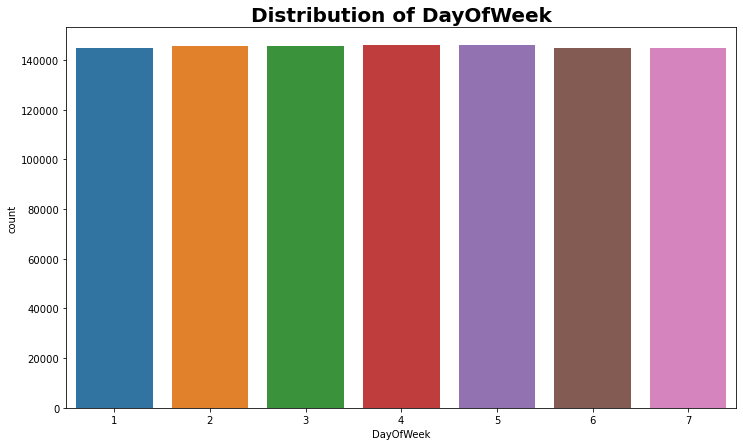

In [434]:
#DAY of week
plot_count(train_df, 'DayOfWeek')

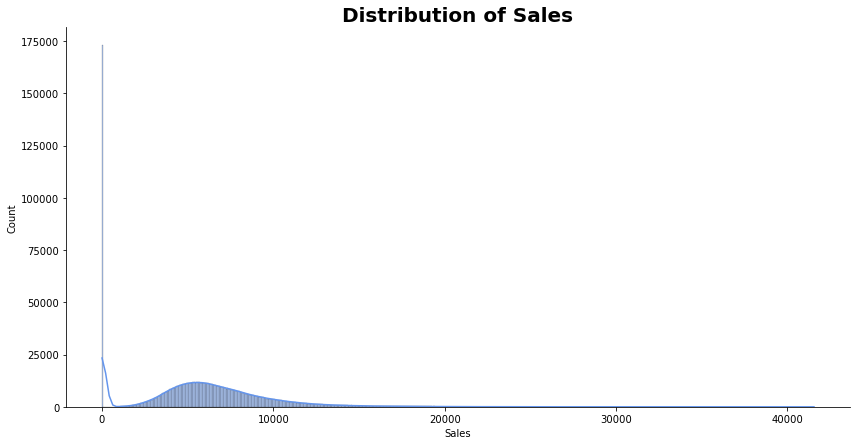

In [435]:
#sales
plot_hist(train_df, 'Sales')

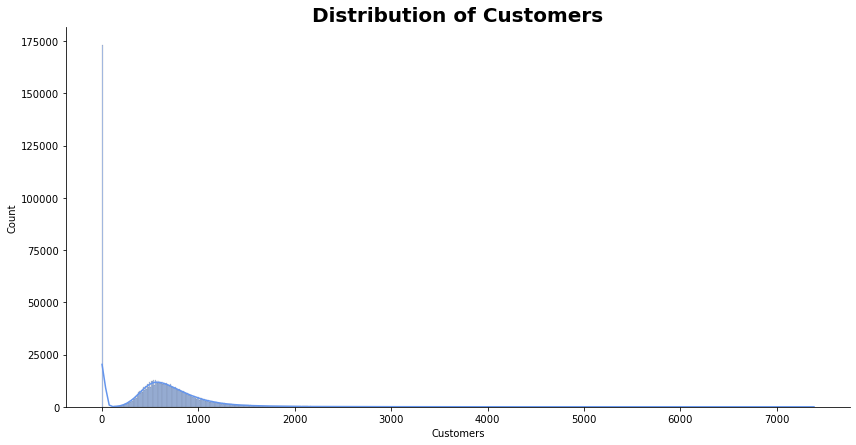

In [436]:
#customers
plot_hist(train_df, 'Customers')

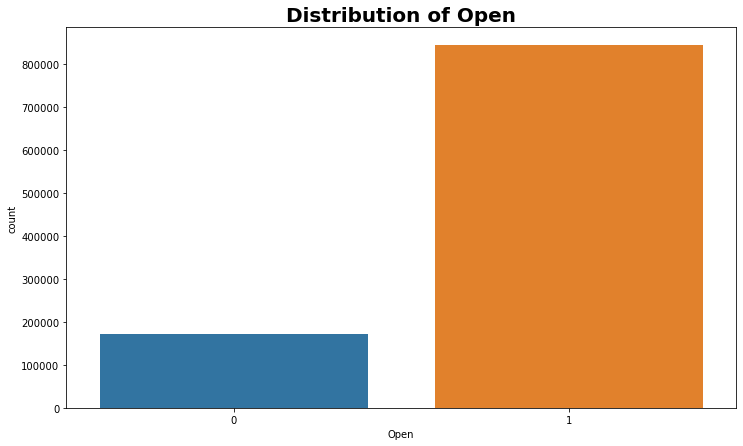

In [437]:
#open
plot_count(train_df, 'Open')

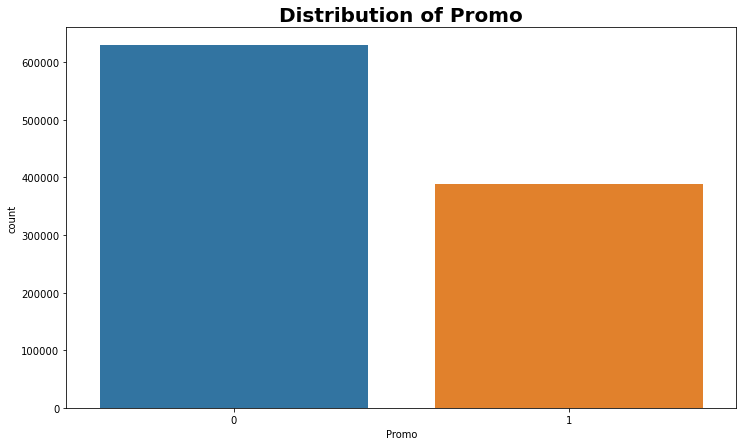

In [438]:
#promo
plot_count(train_df, 'Promo')

In [439]:
#state holiday
# unique value counts
counts_df = train_df['StateHoliday'].value_counts()
counts_df

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64

In [440]:
#schoolHoliday
# unique value counts
counts_df = train_df['SchoolHoliday'].value_counts()
counts_df

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

### BIVARIATE ANALYSIS 

##### StateHoliday and Sales

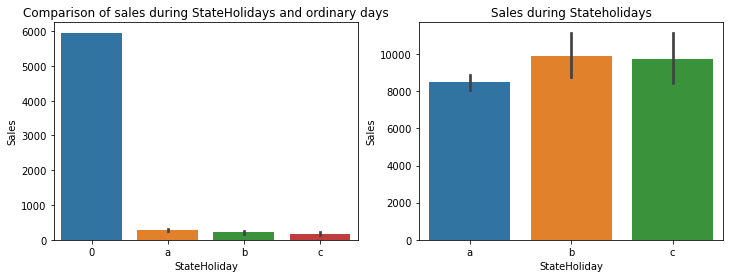

In [441]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (train_df["StateHoliday"] != "0") & (train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_df[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

##### StoreType vs Sales and Customers

In [447]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType_x,Assortment_x,CompetitionDistance_x,CompetitionOpenSinceMonth_x,CompetitionOpenSinceYear_x,Promo2_x,Promo2SinceWeek_x,Promo2SinceYear_x,PromoInterval_x,Year,Month,DayOfMonth,WeekOfYear,weekday,StoreType_y,Assortment_y,CompetitionDistance_y,CompetitionOpenSinceMonth_y,CompetitionOpenSinceYear_y,Promo2_y,Promo2SinceWeek_y,Promo2SinceYear_y,PromoInterval_y,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0


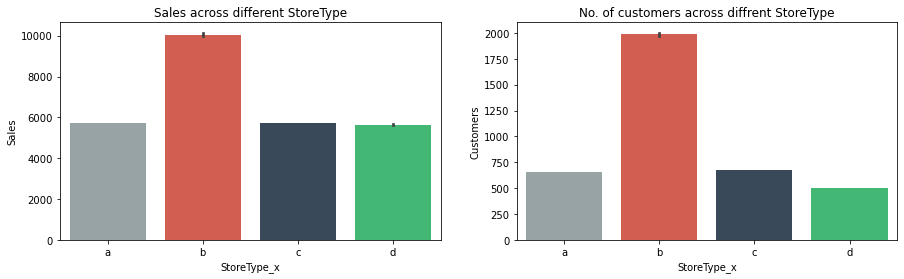

In [449]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType_x', y='Sales', data=df, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType_x', y='Customers', data=df, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

##### Assortment vs Sales and Customers

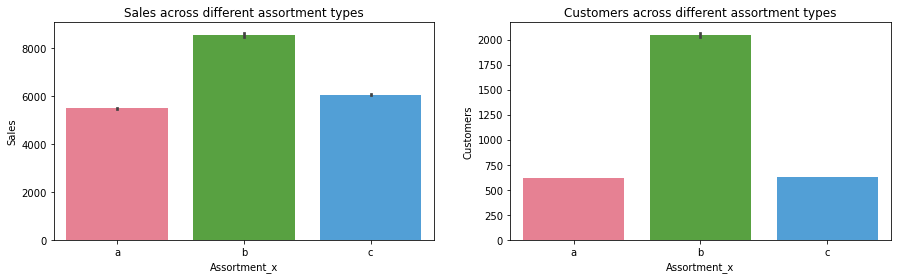

In [450]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment_x', y='Sales', data=df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment_x', y='Customers', data=df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

###### DayOfWeek vs Sales and Customers

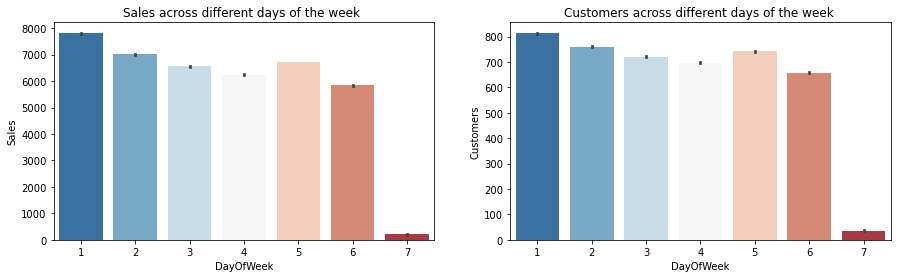

In [445]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_df, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=train_df, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

##### Promo vs Sales and Customers

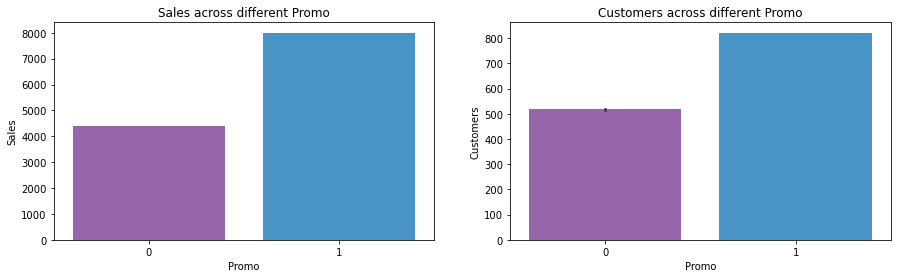

In [453]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=train_df, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=train_df, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

##### Promo2 vs Sales and Customers

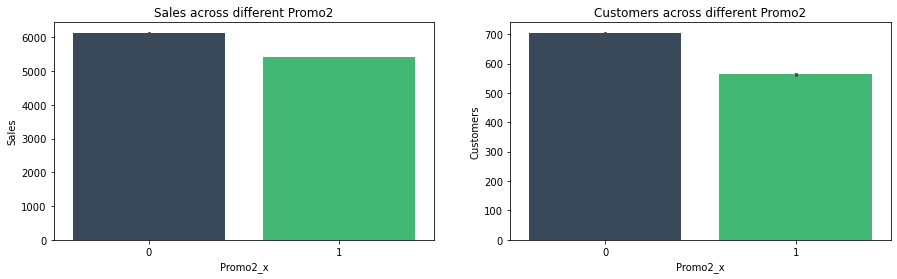

In [454]:
flatui = [ "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2_x', y='Sales', data=df, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2_x', y='Customers', data=df, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

##### PromoInterval vs Sales and Customers

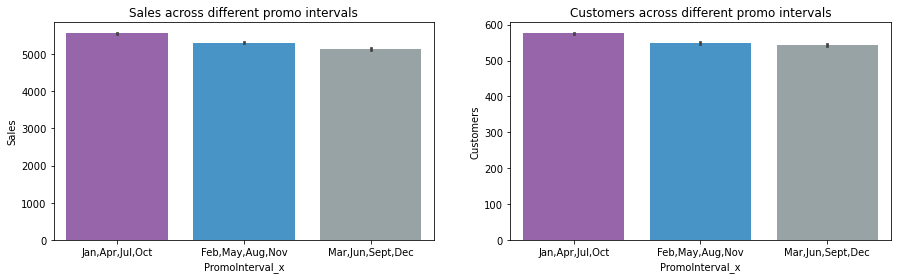

In [484]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (df["Promo2_x"] != 0)

sns.barplot(x='PromoInterval_x', y='Sales', data=df[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval_x', y='Customers', data=df[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()

##### Open and DayOfWeek

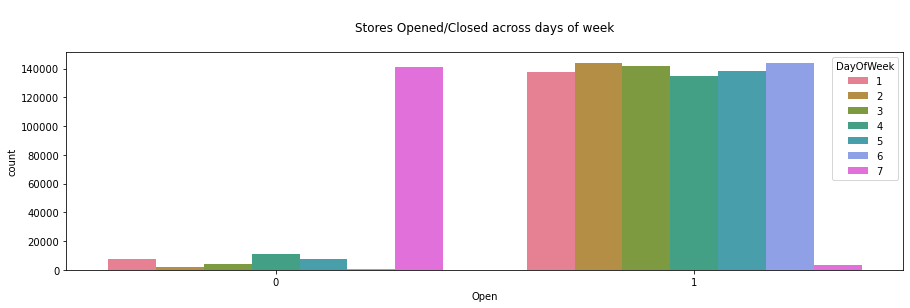

In [485]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_df,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

##### sales and Month 

In [486]:
#sns.barplot(x=' month ', y='Sales', data=df)
#plt.show()

##### competitionDistance and Sales

In [487]:
a = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

KeyError: "Column(s) ['CompetitionDistance'] do not exist"

#### CORRELATION ANALYSIS

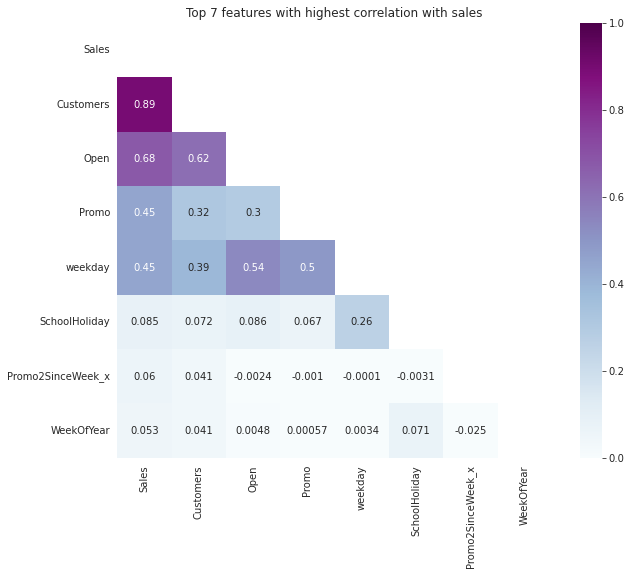

In [483]:
f_most_correlated = df.corr().nlargest(8,'Sales')['Sales'].index
f_correlation = df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

## Task 1.1 ANSWERING BUSINESS QUESTION 

In [456]:
# reading test data
test_df = file_handler.read_csv("../Data/test.csv")
test_df.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [457]:
train_df = file_handler.read_csv("../Data/train.csv")
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType_x,Assortment_x,CompetitionDistance_x,CompetitionOpenSinceMonth_x,CompetitionOpenSinceYear_x,Promo2_x,Promo2SinceWeek_x,Promo2SinceYear_x,PromoInterval_x,Year,Month,DayOfMonth,WeekOfYear,weekday,StoreType_y,Assortment_y,CompetitionDistance_y,CompetitionOpenSinceMonth_y,CompetitionOpenSinceYear_y,Promo2_y,Promo2SinceWeek_y,Promo2SinceYear_y,PromoInterval_y,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0


In [462]:
df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType_x,Assortment_x,CompetitionDistance_x,CompetitionOpenSinceMonth_x,CompetitionOpenSinceYear_x,Promo2_x,Promo2SinceWeek_x,Promo2SinceYear_x,PromoInterval_x,Year,Month,DayOfMonth,WeekOfYear,weekday,StoreType_y,Assortment_y,CompetitionDistance_y,CompetitionOpenSinceMonth_y,CompetitionOpenSinceYear_y,Promo2_y,Promo2SinceWeek_y,Promo2SinceYear_y,PromoInterval_y,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31,1,c,a,1270.0,9,2008,0,0,0,"0,0,0,0",0,0,0,0,0


●	Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

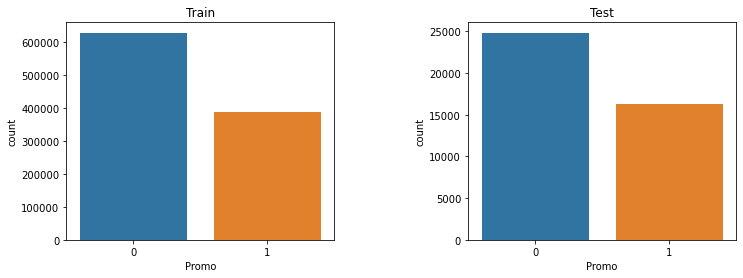

In [458]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_df, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_df, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()

●	Check & compare sales behavior before, during and after holidays

In [465]:
#Monthly sales trend per store type
store_type_a = df[df.StoreType_x == 'a']
store_type_b = df[df.StoreType_x == 'b']
store_type_c = df[df.StoreType_x == 'c']
store_type_d = df[df.StoreType_x == 'd']

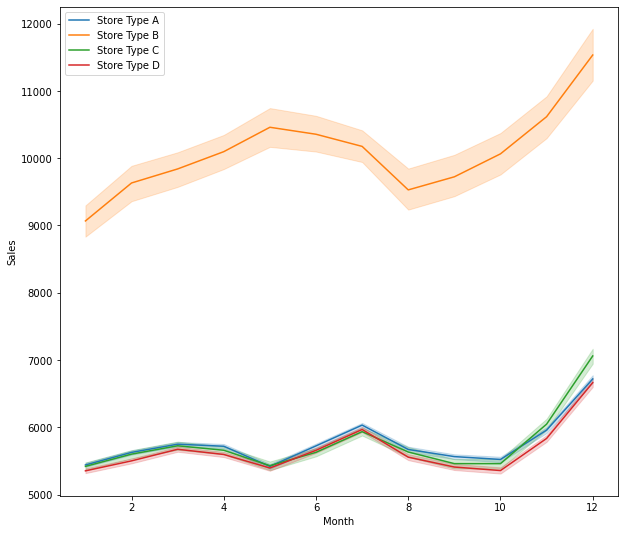

In [466]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

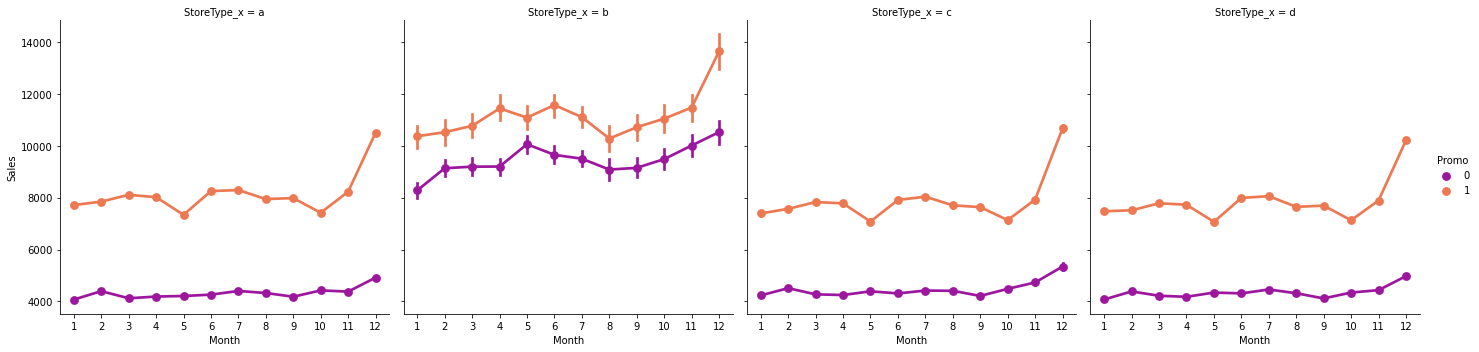

In [467]:
# Monthly sales per store type and promo
sns.factorplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType_x', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

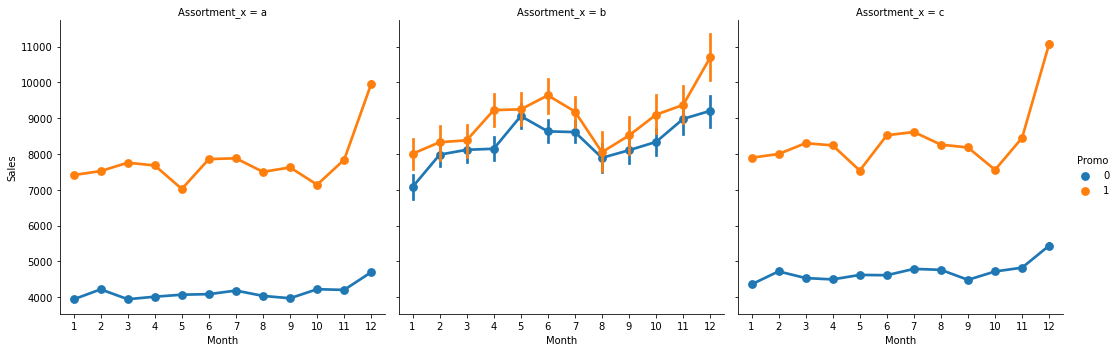

In [468]:
#Monthly sales per Assortment and promo 
sns.factorplot(data = df, x = 'Month', y = 'Sales', col='Assortment_x', hue='Promo', col_order=['a','b','c'])
plt.show()

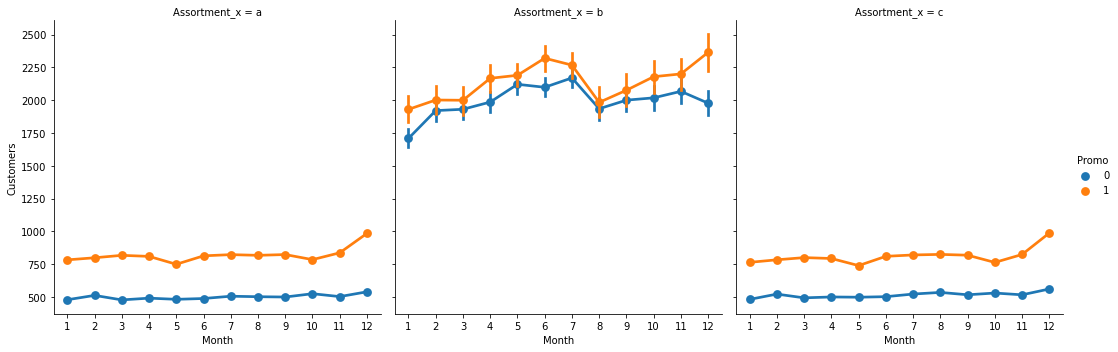

In [470]:
#Monthly customers per Assortment and promo 
sns.factorplot(data = df, x = 'Month', y = 'Customers', col='Assortment_x', hue='Promo', col_order=['a','b','c'])
plt.show()

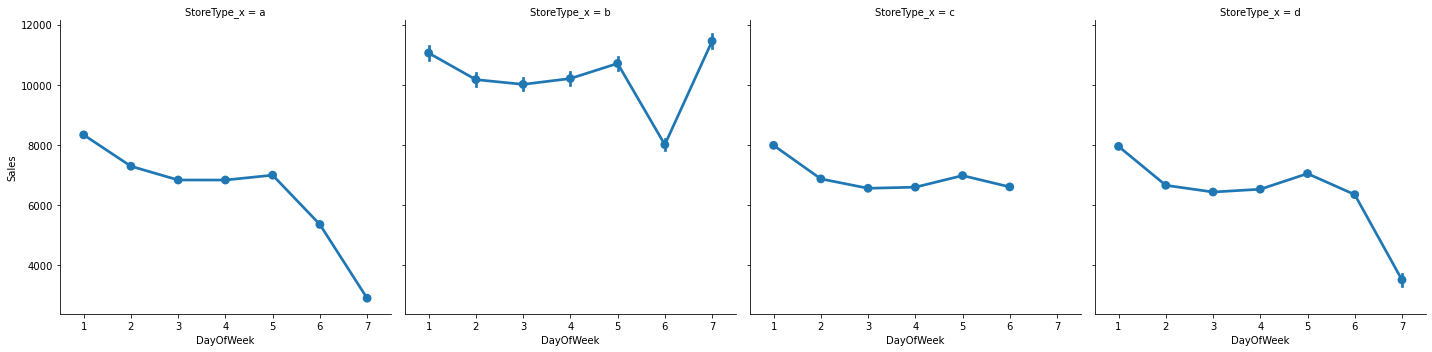

In [477]:
# sales of store open per Dayofweek and store type
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType_x', col_order=['a','b','c', 'd'])
plt.show()


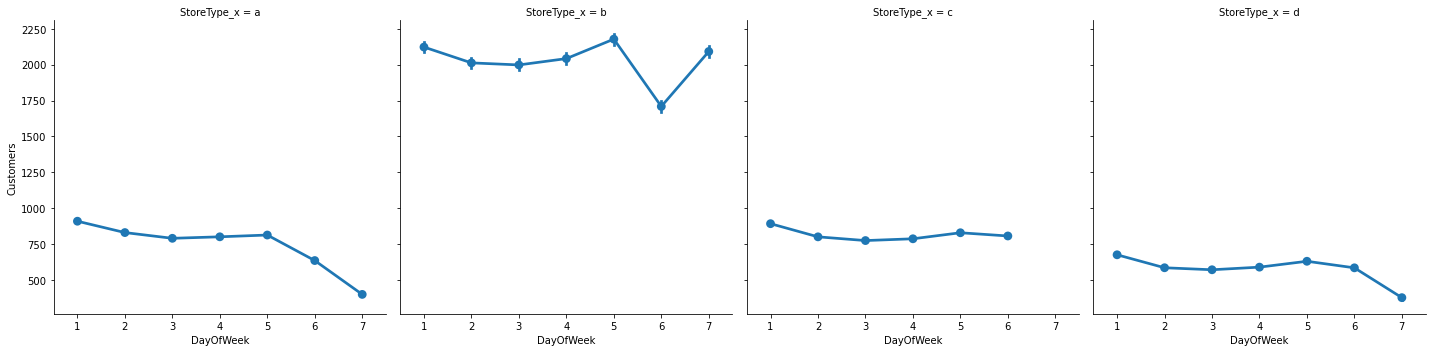

In [478]:
#Customers of stores open per DayOfWeek and StoreType
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='StoreType_x', col_order=['a','b','c', 'd'])
plt.show()

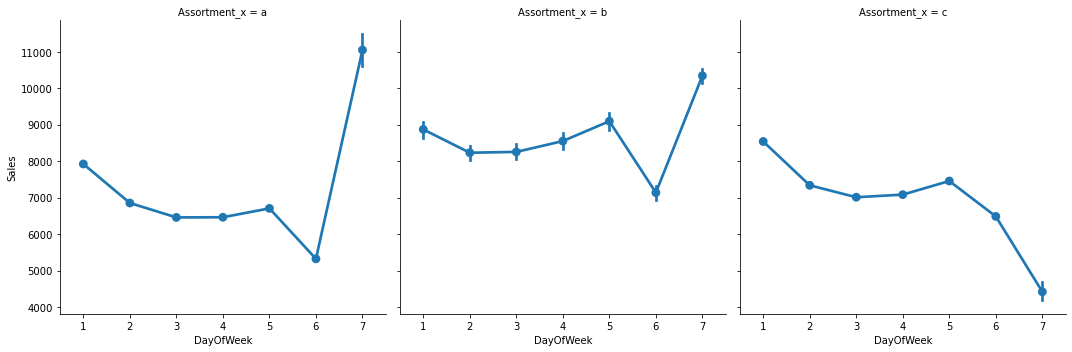

In [480]:
# Sales of stores open per DayOfWeek and Assortment
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='Assortment_x', col_order=['a','b','c'])
plt.show()

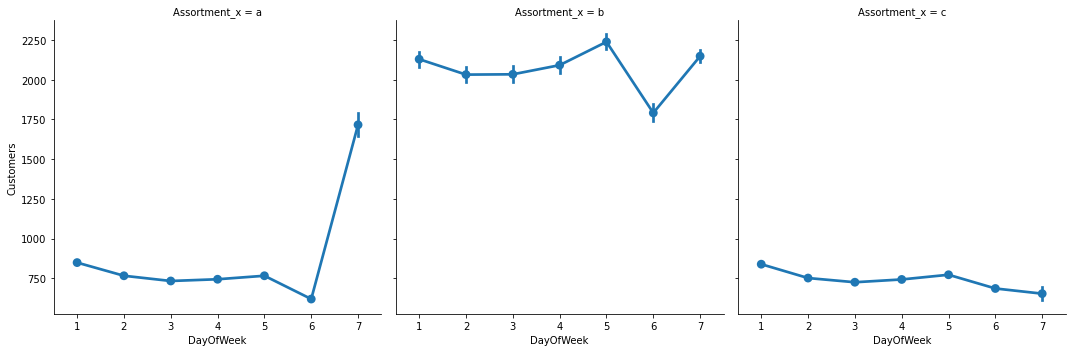

In [481]:
#Customers of stores open per DayOfWeek and Assortment
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Customers', col='Assortment_x', col_order=['a','b','c'])
plt.show()

###### Sales before, after and during Christmas

In [482]:
before_index = (train_df["Date"] >= pd.to_datetime("2013-11-25")) & (train_df["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = train_df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_df["Date"] >= pd.to_datetime("2013-12-25")) & (train_df["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = train_df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_df["Date"] >= pd.to_datetime("2014-01-01")) & (train_df["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = train_df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

●	What can you say about the correlation between sales and number of customers?

The customers is the first feature which has a high relation with sales 0.89

●	How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

For all stores, promotion leads to increase in Sales and Customers. But promotions have low impact on store type b and assortment b when comparing to the other store types and assortments.

●	Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

 So promotions should be applied more in the other store types and assortments.
 
●	Trends of customer behavior during store open and closing times.

Store type b is the most opened store type on all weekdays and has its highest sales on sundays than the other days.

●	Which stores are opened on all weekdays? How does that affect their sales on weekends? 

Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days. The number of cusomers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.

●	Check how the assortment type affects sales

Sales are increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more beauty products or some common medicines for precaution during Christmas celebration.

●	How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals. Even though having large distance between competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.